# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

#### Business Context

The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting new electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement. The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

[Companies often analyze user responses to two variants of a product to decide which of the two variants is more effective. This experimental technique, known as A/B testing, is used to determine whether a new feature attracts users based on a chosen metric.]

#### Objective

The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

1.Do the users spend more time on the new landing page than on the existing landing page?

2.Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

3.Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]

4.Is the time spent on the new page the same for the different language users?

## Data Dictionary

The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

1. user_id - Unique user ID of the person visiting the website

2. group - Whether the user belongs to the first group (control) or the second group (treatment)

3. landing_page - Whether the landing page is new or old

4. time_spent_on_the_page - Time (in minutes) spent by the user on the landing page

5. converted - Whether the user gets converted to a subscriber of the news portal or not

6. language_preferred - Language chosen by the user to view the landing page

## Import all the necessary libraries

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Reading the Data into a DataFrame

In [73]:
df = pd.read_csv('C://Users//benan//Downloads//abtest.csv')

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

#### Displaying the first few rows of the dataset

In [6]:
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


*  The dataset contains the user id, landing page,time spent on page,status converted and language preferred.

#### Displaying the last few rows of the dataset

In [7]:
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


#### Checking the shape of the dataset

In [41]:
df.shape

(100, 6)

*  The dataset contains 100 rows and 6 coloumns.

#### Checking the data types of the columns for the dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


*  The userid and time spent on page are numerical coloums.
*  The group,landing page,status converted and language prefered are categorical.
*  There are no missing values in the data set.

#### Statistical summary of the dataset

In [10]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_id,100.0,NaN,NaN,NaN,546517.0,52.295779,546443.0,546467.75,546492.5,546567.25,546592.0
group,100,2,control,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
landing_page,100,2,old,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time_spent_on_the_page,100.0,NaN,NaN,NaN,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71
converted,100,2,yes,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
language_preferred,100,3,Spanish,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN


*  The average time spent on landing page is 5.37 mins, minimum time spent is 0.19 secs and maximum time spent is 10.71 mins.
*  As mentioned in the problem statement there are two groups.
*  There are 3 languages.
*  Converted status is high.
*  Spanish language preference looks high.

#### Check for missing values

In [11]:
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

*  There is no missing values in the data.

#### Check for duplicates

In [77]:
duplicateRows = df[df.duplicated()]
duplicateRows

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred


* There is no duplicates in this data.

### Univariate Analysis

#### Time spent on the page

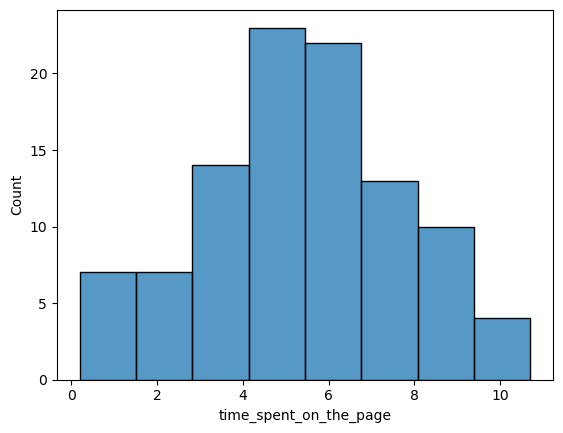

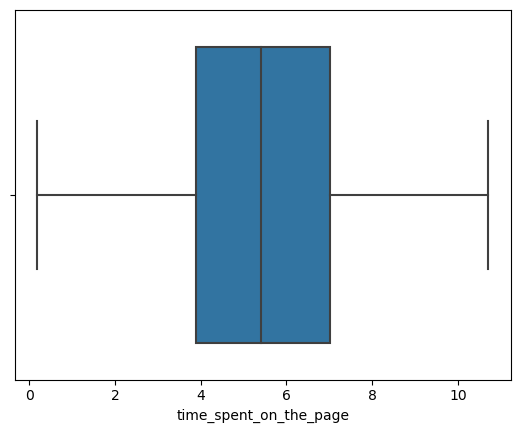

In [14]:
sns.histplot(data=df,x='time_spent_on_the_page')
plt.show()
sns.boxplot(data=df,x='time_spent_on_the_page')
plt.show()

*  The average time spent on landing page is 5.37 mins.

#### Group

In [15]:
df['group'].value_counts()

group
control      50
treatment    50
Name: count, dtype: int64

* There are two groups: control and treatment.
* In hundred users 50 are in control group and another 50 are in treatment group.

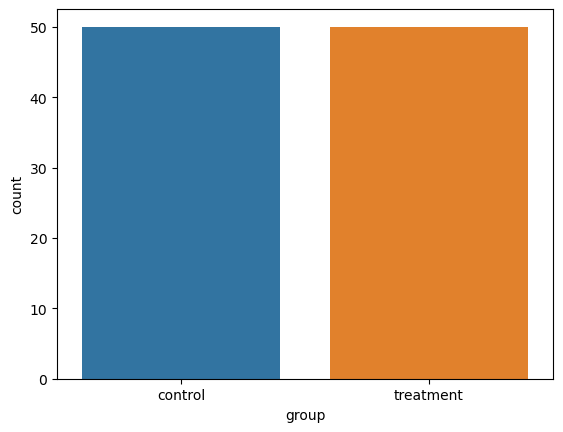

In [16]:
sns.countplot(data=df,x='group')
plt.show()

*  In the sample of 100 people 50 people are in control group and another 50 people are in treatment group.

#### Landing page

In [45]:
df['landing_page'].value_counts()

landing_page
old    50
new    50
Name: count, dtype: int64

* There are 50 old landing pages and 50 new landing pages.

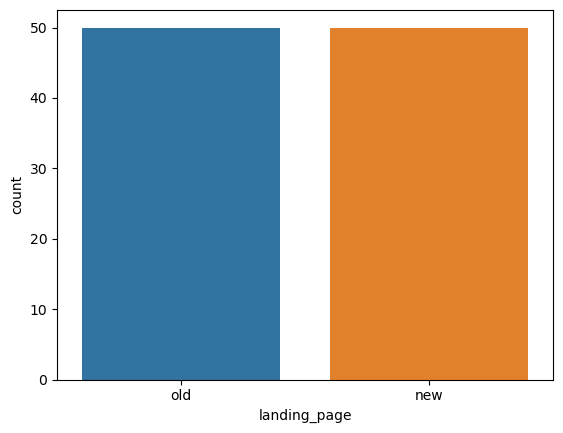

In [18]:
sns.countplot(data=df,x='landing_page')
plt.show()

#### Converted

In [19]:
df['converted'].value_counts()

converted
yes    54
no     46
Name: count, dtype: int64

* The 54 users status converted and 46 users status is not converted.
* There is not much difference in old and new page users.

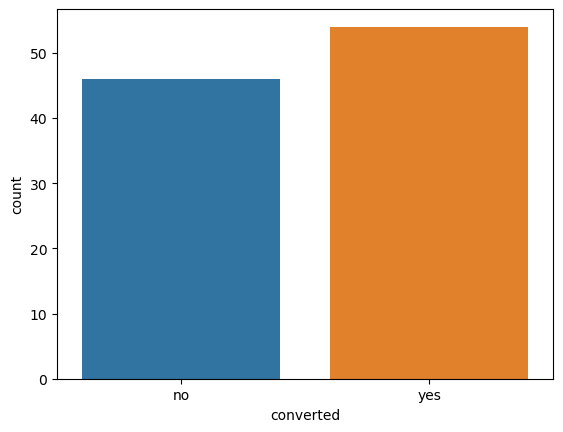

In [20]:
sns.countplot(data=df,x='converted')
plt.show()

* The status converted is higher than status not converted.

#### Language preferred

In [21]:
df['language_preferred'].value_counts()

language_preferred
Spanish    34
French     34
English    32
Name: count, dtype: int64

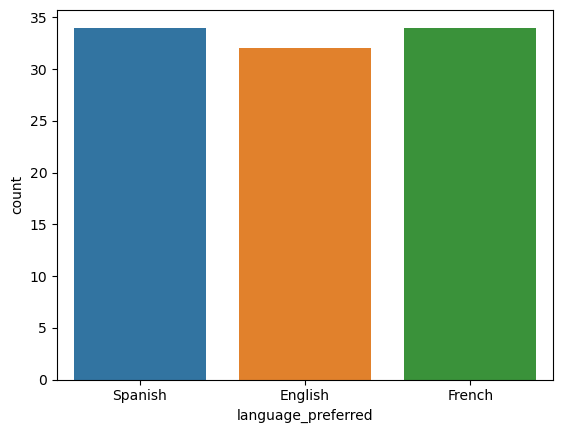

In [22]:
sns.countplot(data=df,x='language_preferred')
plt.show()

* In the sample of 100 people 34 each prefer spanish and french, while 32 prefer english.

### Bivariate Analysis

#### Landing page vs Time spent on the page

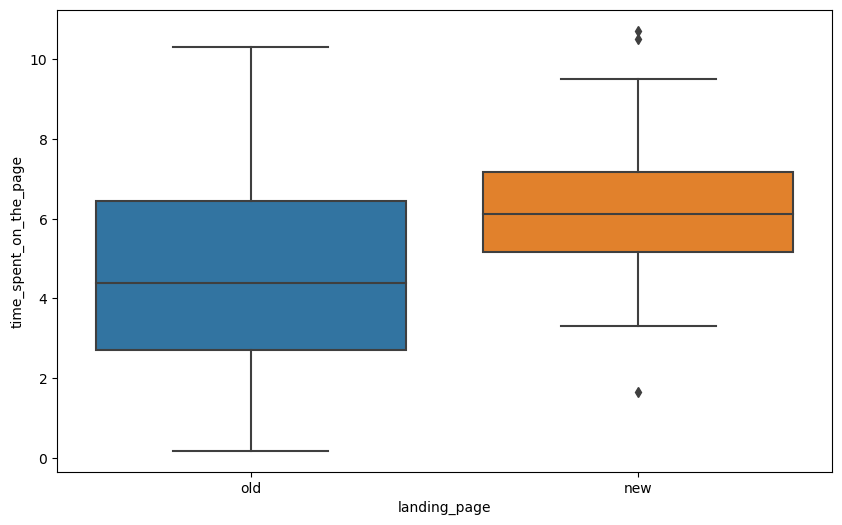

In [26]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='landing_page',y='time_spent_on_the_page')
plt.show()

* The more time spent on new landing page comparing to old landing page.
* The new landing page has outliers.

#### Conversion status vs Time spent on the page

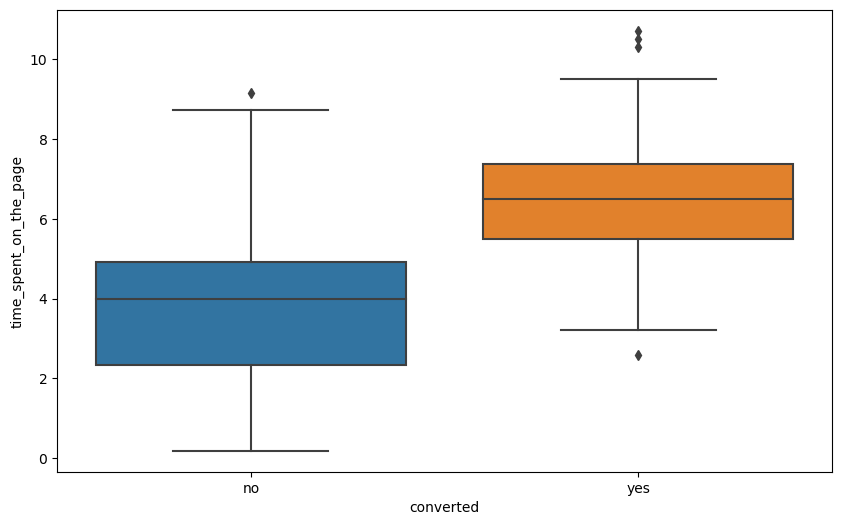

In [24]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='converted',y='time_spent_on_the_page')
plt.show()

*  The status converters are spending more time on landing page.
*  There are ouliers in status converters. 

#### Language preferred vs Time spent on the page

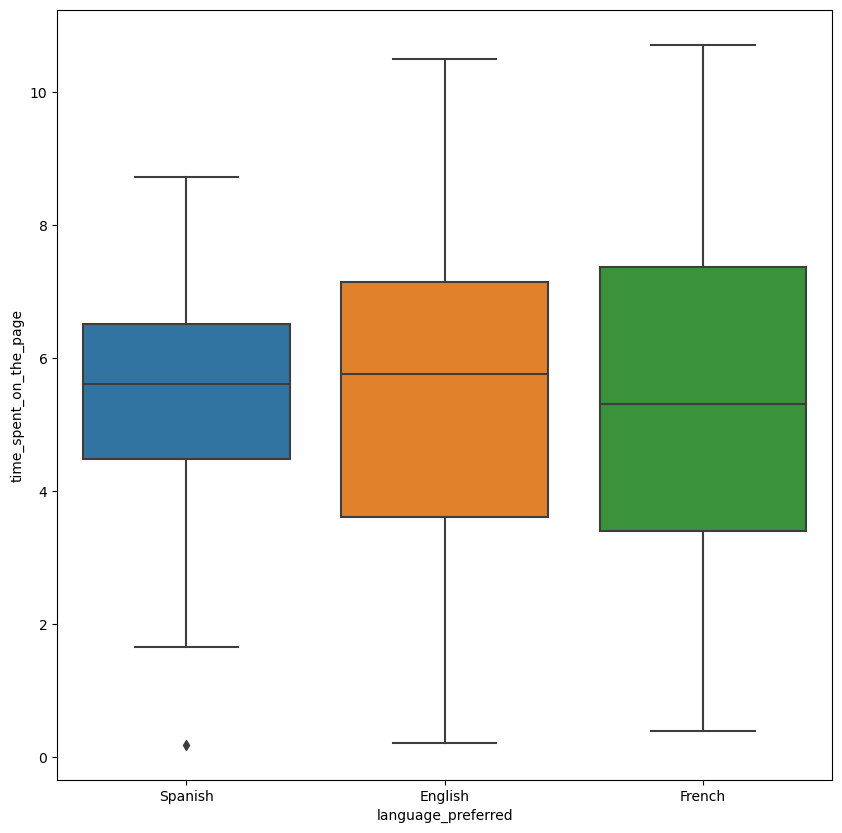

In [47]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df,x='language_preferred',y='time_spent_on_the_page')
plt.show()

* The English preference people are spending more time on landing page.
* Spanish people spending more time followed by French.

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

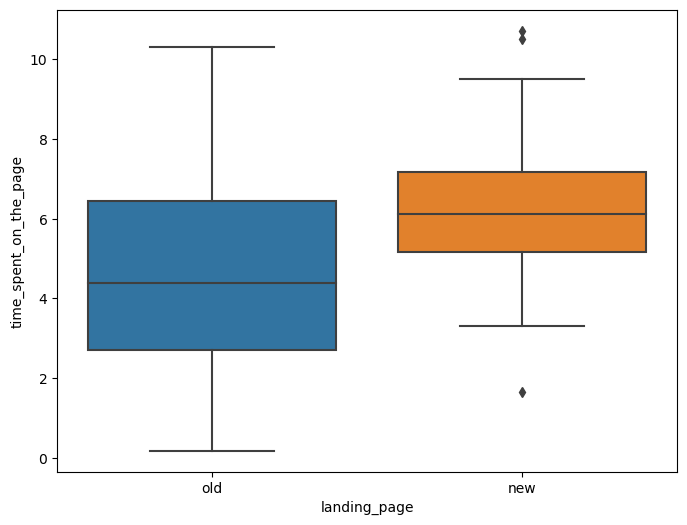

In [26]:
plt.figure(figsize=(8,6))
sns.boxplot(x = 'landing_page', y = 'time_spent_on_the_page', data = df)
plt.show()

* Users spend moretime on new landing page than old landing page.

### Step 1: Define the null and alternate hypotheses

Let $\mu_1, \mu_2$ be the mean of time spent on new landing page and time spent on old landing page.

>$H_0: \mu_1=\mu_2$

against the alternate hypothesis

>$H_a: \mu_1>\mu_2$


### Step 2: Select Appropriate test

This is a one-tailed test concerning two population means from two independent populations. 
The population standard deviations are unknown.

### Step 3: Decide the significance level

As given in the problem statement, we select  𝛼=0.05.

### Step 4: Collect and prepare data

In [55]:
time_spent_newpage = df[df['landing_page'] == 'new']['time_spent_on_the_page']
time_spent_oldpage = df[df['landing_page'] == 'old']['time_spent_on_the_page']
print('The maen of time spent on new landing page',  round(time_spent_newpage.mean(),2))
print('The maen of time spent on old landing page',  round(time_spent_oldpage.mean(),2))
print('The sample standard deviation of the time spent on the new page is:', round(time_spent_newpage.std(),2))
print('The sample standard deviation of the time spent on the old page is:', round(time_spent_oldpage.std(),2))

The maen of time spent on new landing page 6.22
The maen of time spent on old landing page 4.53
The sample standard deviation of the time spent on the new page is: 1.82
The sample standard deviation of the time spent on the old page is: 2.58


* Continuous data - Yes, the usage time is measured on a continuous scale.
* Normally distributed populations - Yes, we are informed that the populations are assumed to be normal.
* Independent populations - As we are taking random samples for two different type of users, the two samples are from two independent populations.
* The sample standard deviations are not equal.
* Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.

 We can use two sample T-test for this problem.

### Step 5: Calculate the p-value

In [56]:
from scipy.stats import ttest_ind
test_stat, p_value = ttest_ind(time_spent_newpage, time_spent_oldpage, equal_var = False, alternative ='greater')
p_value

0.0001392381225166549

### Step 6: Compare the p-value with $\alpha$

In [57]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.0001392381225166549 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

As the p-value(~0.0001) is less than the level of significance, we can reject the null hypothesis.hence,we do have enough evidence to support than time spent on new page is greater than existing land page.

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### Perform Visual Analysis

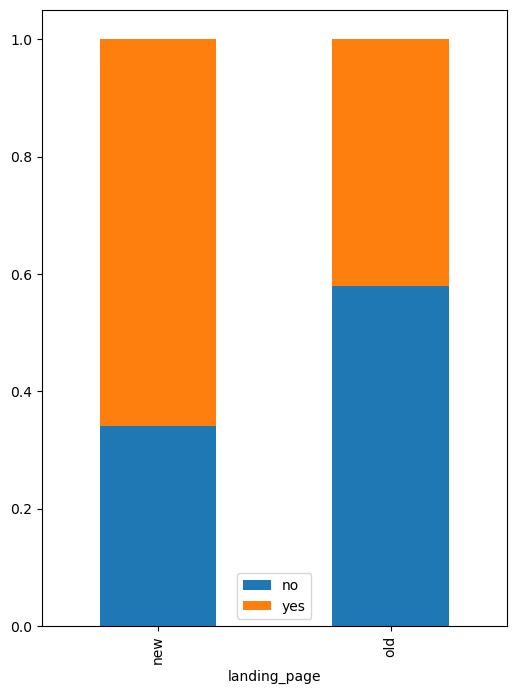

In [78]:
pd.crosstab(df['landing_page'],df['converted'],normalize='index').plot(kind="bar", figsize=(6,8),stacked=True)
plt.legend()
plt.show()

### Step 1: Define the null and alternate hypotheses


Let $p_1,p_2$ be the proportions of time spent on status converted group and time spent on staus not converted group respectively.

>$H_0:

>$H_a:

>$H_0:p_1 =p_2$

against the alternate hypothesis


>$H_a:p_1 > p_2$

### Step 2: Select Appropriate test

This is a one-tailed test concerning two population proportions from two independent populations. this test uses [`proportions_ztest()`]

### Step 3: Decide the significance level

As given in the problem statement, we select α = 0.05.

### Step 4: Collect and prepare data

In [60]:
treatment_converted = df[df['group'] == 'treatment']['converted'].value_counts()['yes']
control_converted = df[df['group'] == 'control']['converted'].value_counts()['yes']
print('The number of users from treatment group converted is',treatment_converted)
print('The number of users from control group converted is',control_converted)
n_control = df.group.value_counts()['control']
n_treatment = df.group.value_counts()['treatment']
print('The numbers of users served the new and old pages are {0} and {1} respectively'.format(n_control, n_treatment ))

The number of users from treatment group converted is 33
The number of users from control group converted is 21
The numbers of users served the new and old pages are 50 and 50 respectively


*  Binomial distributed populations.
*  Independent populations.
*  Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.
*  The standard thing is to check whether np and n(1-p) are greater than or equal to 10. Here, n and p refer to the sample size and sample proportion respectively.

### Step 5: Calculate the p-value

In [61]:
from statsmodels.stats.proportion import proportions_ztest
test_stat, p_value = proportions_ztest([treatment_converted, control_converted] , [n_treatment, n_control], alternative ='larger')
print('The p-value is', p_value)

The p-value is 0.008026308204056278


### Step 6: Compare the p-value with $\alpha$

In [62]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.008026308204056278 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

As the p-value is less than the significance level 0.05, we can reject the null hypothesis.We do have enough statistical 
significance to conclude time spent on status converter is more than time spent on old landing page. 


## 3. Is the conversion and preferred language are independent or related?

### Perform Visual Analysis

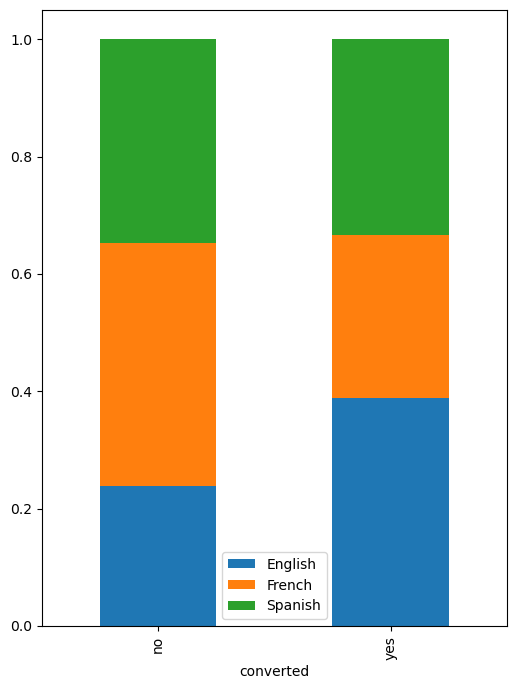

In [25]:
pd.crosstab(df['converted'],df['language_preferred'],normalize='index').plot(kind="bar", figsize=(6,8), stacked=True)
plt.legend()
plt.show()

### Step 1: Define the null and alternate hypotheses

$H_0:$ Language preference is independent on spending time of status converters.

against the alternate hypothesis

$H_a:$ Language preference is dependent on spending time in status converters.

### Step 2: Select Appropriate test

This is a problem of the test of independence, concerning two categorical variables - converted status and preferred language.
The test is Chi-Square test for independence .

### Step 3: Decide the significance level

As given in the problem statement, we select α = 0.05.

### Step 4: Collect and prepare data

In [49]:
contingency_table = pd.crosstab(df['converted'],df['language_preferred'])
contingency_table

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


### Let's test whether the assumptions are satisfied or not
* Categorical variables - Yes
* Expected value of the number of sample observations in each level of the variable is at least 5 - Yes, the number of observations in each level is greater than 5.
* Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.

### Step 5: Calculate the p-value

In [63]:
from scipy.stats import chi2_contingency   # For Chi-Square test
chi2, p_value, dof, exp_freq = chi2_contingency(contingency_table)
print('The p-value is', p_value)

The p-value is 0.21298887487543447


### Step 6: Compare the p-value with $\alpha$

In [29]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.21298887487543447 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

As the p-value (~0.2129) is greater than the level of significance, we fail to reject the null hypothesis.We do have enough statistical significance to conclude that status converted and language preference are independent.

## 4. Is the time spent on the new page same for the different language users?

## Perform Visual Analysis

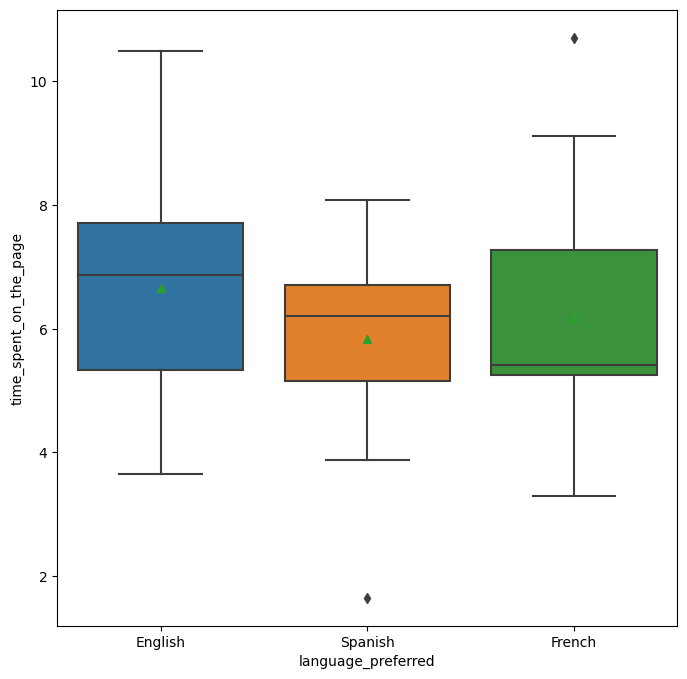

In [33]:
df_new = df[df['landing_page'] == 'new']
plt.figure(figsize=(8,8))
sns.boxplot(x = 'language_preferred', y ='time_spent_on_the_page', showmeans = True, data = df_new)
plt.show()


In [31]:
df_new.groupby(['language_preferred'])['time_spent_on_the_page'].mean()

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64

*  English language users spent more time on landing page followed by french and spanish resptectively.
*  There is same mean difference for three language preference.
*  When compare three mean differrence spending time English has highest spending time on page.

### Step 1: Define the null and alternate hypotheses

Let $\mu_1, \mu_2, \mu_3$ be the means of language preference English, French and Spanish .

We will test the null hypothesis

>$H_0: \mu_1 = \mu_2 = \mu_3$

against the alternative hypothesis

>$H_a: $ At least one lanuage preference is different from the rest.


### Step 2: Select Appropriate test

This is a problem, concerning three population means.One-way ANOVA is an appropriate test here provided normality and equality of variance assumptions are verified.

**One-way ANOVA test**

In a one-way ANOVA test, we compare the means from several populations to test if there is any significance difference between them. The results from an ANOVA test are most reliable when the assumptions of normality and equality of variances are satisfied.

* For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

* For equality of variance, Levene test is applied to the response variable.

**Shapiro-Wilk’s test**

We will test the null hypothesis

>$H_0:$ The time spent on the page follow a normal distribution

against the alternative hypothesis

>$H_a:$ The time spent on the page do not not follow a normal distribution

In [65]:
import scipy.stats as stats 
w, p_value = stats.shapiro(df['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.5643193125724792


Since p-value of the test is very large than the 5% significance level, we fail to reject the null hypothesis that the response follows the normal distribution.

**Levene’s test**

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [69]:
statistic, p_value = stats.levene(df_new[df_new['language_preferred']=='English']['time_spent_on_the_page'],
                                  df_new[df_new['language_preferred']=='French']['time_spent_on_the_page'],
                                  df_new[df_new['language_preferred']=='Spanish']['time_spent_on_the_page'])
                                                                    
print('The p-value is', p_value)

The p-value is 0.46711357711340173


Since the p-value is large than the 5% significance level, we fail to reject the null hypothesis of homogeneity of variances

### Step 3: Decide the significance level

As given in the problem statement, we select α = 0.05.

### Step 4: Collect and prepare data

In [35]:
time_spent_on_English = df_new[df_new['language_preferred']=='English']['time_spent_on_the_page']
time_spent_on_French = df_new[df_new['language_preferred']=='French']['time_spent_on_the_page']
time_spent_on_Spanish = df_new[df_new['language_preferred']=='Spanish']['time_spent_on_the_page']

### Step 5: Calculate the p-value

- We will use the `f_oneway()` function from the `scipy.stats` library to perform a one-way ANOVA test.
- The `f_oneway()` function takes the sample observations from the different groups and returns the test statistic and the p-value for the test. 

In [66]:
from scipy.stats import f_oneway
test_stat, p_value = f_oneway(time_spent_on_English, time_spent_on_French, time_spent_on_Spanish)
print('The p-value is', p_value)

The p-value is 0.43204138694325955


### Step 6: Compare the p-value with $\alpha$

In [37]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

As the p-value(~0.4320) is greater than the level of significance, we fail to reject the null hypothesis.Hence, wehave enough statistical evidence to say that all the mean spending time are equal.

## Conclusion  

* The average time spent on landing page is 5.37 mins.
* The more time spent on new landing page comparing to old landing page.
* In the sample of 100 people 34 each prefer spanish and french, while 32 prefer english.
* The English preference people are spending more time on landing page.
* The 54 users status converted and 46 users status is not converted.
* There is not much difference in old and new page users.
* we do not have enough evidence to say that converted status are dependent on preferred language.
* The status converters are spending more time on new landing page than existing page.



## Business Recommendations

* English language spend more time in landing page comparing to other language.
* Improving lot of news in english will be helpfull to spent more in landing page.
* The status converters are spending more time on new landing page than existing page.So there is positive result in new         landing page.
* There is not much difference in old and new page users.New features might help users to convert from old landing to new         landing page.

___